In [1]:
import re
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("../data/gurgaon_properties_cleaned_v1.csv")

In [3]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features
0,flat,raheja navodaya,sector 92,0.62,4807.0,1290.0,Built Up area: 1498 (139.17 sq.m.)Carpet area:...,2,2,2,not available,5.0,NaN,0 to 1 Year Old,"['NH8', 'Dwarka Expressway', 'IMT Manesar', 'Y...",[],NaN
1,flat,paras quartier,gwal pahari,5.90,11028.0,5350.0,Built Up area: 5350 (497.03 sq.m.),4,4,3+,not available,0.0,NaN,5 to 10 Year Old,"['Sector 55-56 Metro Station', 'South point Ma...","['1 Light', 'No AC', 'No Bed', 'No Chimney', '...",NaN
2,flat,signature global synera,sector 81,0.50,7886.0,634.0,Carpet area: 634 (58.9 sq.m.),2,2,1,not available,11.0,East,0 to 1 Year Old,"['Sapphire 83 Mall', 'Delhi Jaipur Expressway'...","['1 Water Purifier', '3 Fan', '1 Fridge', '1 E...","['Security / Fire Alarm', 'Feng Shui / Vaastu ..."
3,flat,ss the leaf,sector 85,2.05,7290.0,2812.0,Super Built up area 2812(261.24 sq.m.)Built Up...,4,4,3+,servant room,4.0,North-East,1 to 5 Year Old,"['Sapphire 83 Mall', 'Dwarka Expressway', 'Cen...","['4 Wardrobe', '6 Fan', '1 Exhaust Fan', '3 Ge...","['Feng Shui / Vaastu Compliant', 'Security / F..."
4,flat,m3m heights,sector 65,1.99,15793.0,1260.0,Super Built up area 1260(117.06 sq.m.),2,2,2,not available,26.0,NaN,2023-12-01 00:00:00,"['Rapid Metro Sector 56', 'M3m 65th Avenue Mal...",[],NaN


1. AreaWithType

In [4]:
df.sample(5)[['price', 'area', 'areaWithType']]

,price,area,areaWithType
2351,0.95,1415.0,Super Built up area 1415(131.46 sq.m.)
3828,0.36,400.0,Super Built up area 406(37.72 sq.m.)Carpet are...
2391,4.60,1717.0,Carpet area: 1717 (159.51 sq.m.)
591,1.60,2364.0,Super Built up area 2364(219.62 sq.m.)
2382,0.88,1854.0,Super Built up area 1854(172.24 sq.m.)Built Up...


In [5]:
def get_super_built_up_area(text):
    match = re.search(r'Super Built up area (\d+\.?\d*)', text)
    if match:
        return float(match.group(1))
    return None

In [6]:
def get_area(text, area_type):
    match = re.search(area_type + r'\s*:\s*(\d+\.?\d*)', text)
    if match:
        return float(match.group(1))
    return None

In [7]:
def convert_to_sqft(text, area_value):
    if area_value is None:
        return None
    match = re.search(r'{} \((\d+\.?\d*) sq.m.\)'.format(area_value), text)
    if match:
        sq_m_value = float(match.group(1))
        return sq_m_value * 10.7639
    return area_value

In [8]:
# Extract Super Built up area and convert to sqft if needed
df['super_built_up_area'] = df['areaWithType'].apply(get_super_built_up_area)
df['super_built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['super_built_up_area']), axis=1)

# Extract Built Up area and convert to sqft if needed
df['built_up_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Built Up area'))
df['built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['built_up_area']), axis=1)

# Extract Carpet area and convert to sqft if needed
df['carpet_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Carpet area'))
df['carpet_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['carpet_area']), axis=1)

In [9]:
df[['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].sample(5)

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
2843,0.56,flat,706.0,Carpet area: 700 (65.03 sq.m.),NaN,NaN,700.0
321,1.42,flat,1775.0,Carpet area: 1775 (164.9 sq.m.),NaN,NaN,1775.0
959,2.10,flat,2355.0,Super Built up area 2355(218.79 sq.m.),2355.0,NaN,NaN
3597,1.17,flat,1410.0,Super Built up area 1410(130.99 sq.m.),1410.0,NaN,NaN
768,1.66,flat,1976.0,Super Built up area 1976(183.58 sq.m.)Built Up...,1976.0,1900.0,1500.0


In [10]:
df.duplicated().sum()

np.int64(122)

In [11]:
df[~((df['super_built_up_area'].isnull()) | (df['built_up_area'].isnull())| (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].shape

(534, 7)

In [12]:
df[df['areaWithType'].str.contains('Plot')][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].head(5)

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
15,5.25,house,4500.0,Plot area 1944(180.6 sq.m.)Built Up area: 4650...,NaN,4650.0,4500.0
18,5.15,house,2727.0,Plot area 303(253.35 sq.m.)Built Up area: 302 ...,NaN,302.0,300.0
21,1.55,house,1116.0,Plot area 120(100.34 sq.m.),NaN,NaN,NaN
47,5.50,house,1440.0,Plot area 160(133.78 sq.m.),NaN,NaN,NaN
54,3.20,house,540.0,Plot area 60(50.17 sq.m.),NaN,NaN,NaN


In [13]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                    38
price_per_sqft           38
area                     38
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
additionalRoom            0
floorNum                 19
facing                 1123
agePossession             1
nearbyLocations         189
furnishDetails          996
features                654
super_built_up_area    1911
built_up_area          2631
carpet_area            1874
dtype: int64

In [14]:
all_nan_df = df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']]

In [15]:
all_nan_df.head()

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
21,1.55,house,1116.0,Plot area 120(100.34 sq.m.),NaN,NaN,NaN
47,5.50,house,1440.0,Plot area 160(133.78 sq.m.),NaN,NaN,NaN
54,3.20,house,540.0,Plot area 60(50.17 sq.m.),NaN,NaN,NaN
57,10.00,house,550.0,Plot area 550(51.1 sq.m.),NaN,NaN,NaN
60,0.35,house,360.0,Plot area 40(33.45 sq.m.),NaN,NaN,NaN


In [16]:
all_nan_index = df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].index

In [17]:
def extract_plot_area(area_with_type):
    match = re.search(r'Plot area (\d+\.?\d*)', area_with_type)
    return float(match.group(1)) if match else None

In [18]:
all_nan_df['built_up_area'] = all_nan_df['areaWithType'].apply(extract_plot_area)

In [19]:
all_nan_df

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
21,1.55,house,1116.0,Plot area 120(100.34 sq.m.),NaN,120.0,NaN
47,5.50,house,1440.0,Plot area 160(133.78 sq.m.),NaN,160.0,NaN
54,3.20,house,540.0,Plot area 60(50.17 sq.m.),NaN,60.0,NaN
57,10.00,house,550.0,Plot area 550(51.1 sq.m.),NaN,550.0,NaN
60,0.35,house,360.0,Plot area 40(33.45 sq.m.),NaN,40.0,NaN
...,...,...,...,...,...,...,...
3784,6.00,house,2700.0,Plot area 300(250.84 sq.m.),NaN,300.0,NaN
3817,0.95,house,1070.0,Plot area 1070(99.41 sq.m.),NaN,1070.0,NaN
3818,0.50,house,900.0,Plot area 900(83.61 sq.m.),NaN,900.0,NaN
3825,1.50,house,1170.0,Plot area 130(108.7 sq.m.),NaN,130.0,NaN


In [20]:
def convert_scale(row):
    if np.isnan(row['area']) or np.isnan(row['built_up_area']):
        return row['built_up_area']
    else:
        if round(row['area']/row['built_up_area']) == 9.0:
            return row['built_up_area'] * 9
        elif round(row['area']/row['built_up_area']) == 11.0:
            return row['built_up_area'] * 10.7
        else:
            return row['built_up_area']

In [21]:
all_nan_df['built_up_area'] = all_nan_df.apply(convert_scale,axis=1)

In [22]:
all_nan_df

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
21,1.55,house,1116.0,Plot area 120(100.34 sq.m.),NaN,1080.0,NaN
47,5.50,house,1440.0,Plot area 160(133.78 sq.m.),NaN,1440.0,NaN
54,3.20,house,540.0,Plot area 60(50.17 sq.m.),NaN,540.0,NaN
57,10.00,house,550.0,Plot area 550(51.1 sq.m.),NaN,550.0,NaN
60,0.35,house,360.0,Plot area 40(33.45 sq.m.),NaN,360.0,NaN
...,...,...,...,...,...,...,...
3784,6.00,house,2700.0,Plot area 300(250.84 sq.m.),NaN,2700.0,NaN
3817,0.95,house,1070.0,Plot area 1070(99.41 sq.m.),NaN,1070.0,NaN
3818,0.50,house,900.0,Plot area 900(83.61 sq.m.),NaN,900.0,NaN
3825,1.50,house,1170.0,Plot area 130(108.7 sq.m.),NaN,1170.0,NaN


In [23]:
df.update(all_nan_df)

In [24]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area
0,flat,raheja navodaya,sector 92,0.62,4807.0,1290.0,Built Up area: 1498 (139.17 sq.m.)Carpet area:...,2,2,2,not available,5.0,NaN,0 to 1 Year Old,"['NH8', 'Dwarka Expressway', 'IMT Manesar', 'Y...",[],NaN,NaN,1498.0,1064.0
1,flat,paras quartier,gwal pahari,5.90,11028.0,5350.0,Built Up area: 5350 (497.03 sq.m.),4,4,3+,not available,0.0,NaN,5 to 10 Year Old,"['Sector 55-56 Metro Station', 'South point Ma...","['1 Light', 'No AC', 'No Bed', 'No Chimney', '...",NaN,NaN,5350.0,NaN
2,flat,signature global synera,sector 81,0.50,7886.0,634.0,Carpet area: 634 (58.9 sq.m.),2,2,1,not available,11.0,East,0 to 1 Year Old,"['Sapphire 83 Mall', 'Delhi Jaipur Expressway'...","['1 Water Purifier', '3 Fan', '1 Fridge', '1 E...","['Security / Fire Alarm', 'Feng Shui / Vaastu ...",NaN,NaN,634.0
3,flat,ss the leaf,sector 85,2.05,7290.0,2812.0,Super Built up area 2812(261.24 sq.m.)Built Up...,4,4,3+,servant room,4.0,North-East,1 to 5 Year Old,"['Sapphire 83 Mall', 'Dwarka Expressway', 'Cen...","['4 Wardrobe', '6 Fan', '1 Exhaust Fan', '3 Ge...","['Feng Shui / Vaastu Compliant', 'Security / F...",2812.0,2500.0,2250.0
4,flat,m3m heights,sector 65,1.99,15793.0,1260.0,Super Built up area 1260(117.06 sq.m.),2,2,2,not available,26.0,NaN,2023-12-01 00:00:00,"['Rapid Metro Sector 56', 'M3m 65th Avenue Mal...",[],NaN,1260.0,NaN,NaN


2. additionalRoom

In [25]:
df['additionalRoom'].value_counts()

additionalRoom
not available                                    1610
servant room                                      706
study room                                        250
others                                            225
pooja room                                        165
                                                 ... 
servant room,store room,study room,pooja room       1
store room,servant room,pooja room                  1
servant room,study room,others                      1
servant room,pooja room,store room,study room       1
store room,servant room,study room,pooja room       1
Name: count, Length: 65, dtype: int64

In [26]:
new_cols = ['study room', 'servant room', 'store room', 'pooja room', 'others']
for col in new_cols:
    df[col] = df['additionalRoom'].str.contains(col).astype(int)

In [27]:
df.sample(5)[['study room', 'servant room', 'store room', 'pooja room', 'others']]

,study room,servant room,store room,pooja room,others
1809,0,0,0,0,0
1664,0,1,0,0,0
2476,1,0,0,0,0
299,0,0,0,0,0
3535,0,0,0,0,0


In [28]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others
0,flat,raheja navodaya,sector 92,0.62,4807.0,1290.0,Built Up area: 1498 (139.17 sq.m.)Carpet area:...,2,2,2,...,[],NaN,NaN,1498.0,1064.0,0,0,0,0,0
1,flat,paras quartier,gwal pahari,5.90,11028.0,5350.0,Built Up area: 5350 (497.03 sq.m.),4,4,3+,...,"['1 Light', 'No AC', 'No Bed', 'No Chimney', '...",NaN,NaN,5350.0,NaN,0,0,0,0,0
2,flat,signature global synera,sector 81,0.50,7886.0,634.0,Carpet area: 634 (58.9 sq.m.),2,2,1,...,"['1 Water Purifier', '3 Fan', '1 Fridge', '1 E...","['Security / Fire Alarm', 'Feng Shui / Vaastu ...",NaN,NaN,634.0,0,0,0,0,0
3,flat,ss the leaf,sector 85,2.05,7290.0,2812.0,Super Built up area 2812(261.24 sq.m.)Built Up...,4,4,3+,...,"['4 Wardrobe', '6 Fan', '1 Exhaust Fan', '3 Ge...","['Feng Shui / Vaastu Compliant', 'Security / F...",2812.0,2500.0,2250.0,0,1,0,0,0
4,flat,m3m heights,sector 65,1.99,15793.0,1260.0,Super Built up area 1260(117.06 sq.m.),2,2,2,...,[],NaN,1260.0,NaN,NaN,0,0,0,0,0


3. agePossession

In [29]:
df['agePossession'].value_counts()

agePossession
1 to 5 Year Old        1677
5 to 10 Year Old        578
0 to 1 Year Old         533
undefined               346
10+ Year Old            311
Under Construction       93
Within 6 months          70
Within 3 months          26
2023-12-01 00:00:00      22
By 2023                  19
By 2024                  17
2024-12-01 00:00:00      16
2024-03-01 00:00:00      14
2024-10-01 00:00:00       8
2024-01-01 00:00:00       8
2025-12-01 00:00:00       7
2023-08-01 00:00:00       7
2024-06-01 00:00:00       7
2024-08-01 00:00:00       5
2023-11-01 00:00:00       5
2023-10-01 00:00:00       4
By 2025                   4
2023-09-01 00:00:00       4
2024-07-01 00:00:00       4
2025-01-01 00:00:00       3
2024-11-01 00:00:00       3
2024-05-01 00:00:00       3
2024-02-01 00:00:00       3
2026-04-01 00:00:00       2
2025-08-01 00:00:00       2
2027-07-01 00:00:00       2
2026-01-01 00:00:00       2
2025-07-01 00:00:00       2
By 2027                   2
2025-03-01 00:00:00       2
2025-1

In [30]:
def categorize_age_possession(value):
    if pd.isna(value):
        return "Undefined"
    if "0 to 1 Year Old" in value or "Within 6 months" in value or "Within 3 months" in value:
        return "New Property"
    if "1 to 5 Year Old" in value:
        return "Relatively New"
    if "5 to 10 Year Old" in value:
        return "Moderately Old"
    if "10+ Year Old" in value:
        return "Old Property"
    if "Under Construction" in value or "By" in value:
        return "Under Construction"
    try:
        # For entries like 'May 2024'
        int(value.split(" ")[-1])
        return "Under Construction"
    except:
        return "Undefined"

In [31]:
df['agePossession'] = df['agePossession'].apply(categorize_age_possession)

In [32]:
df['agePossession'].value_counts()

agePossession
Relatively New        1677
New Property           629
Moderately Old         578
Undefined              499
Old Property           311
Under Construction     135
Name: count, dtype: int64

In [33]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others
0,flat,raheja navodaya,sector 92,0.62,4807.0,1290.0,Built Up area: 1498 (139.17 sq.m.)Carpet area:...,2,2,2,...,[],NaN,NaN,1498.0,1064.0,0,0,0,0,0
1,flat,paras quartier,gwal pahari,5.90,11028.0,5350.0,Built Up area: 5350 (497.03 sq.m.),4,4,3+,...,"['1 Light', 'No AC', 'No Bed', 'No Chimney', '...",NaN,NaN,5350.0,NaN,0,0,0,0,0
2,flat,signature global synera,sector 81,0.50,7886.0,634.0,Carpet area: 634 (58.9 sq.m.),2,2,1,...,"['1 Water Purifier', '3 Fan', '1 Fridge', '1 E...","['Security / Fire Alarm', 'Feng Shui / Vaastu ...",NaN,NaN,634.0,0,0,0,0,0
3,flat,ss the leaf,sector 85,2.05,7290.0,2812.0,Super Built up area 2812(261.24 sq.m.)Built Up...,4,4,3+,...,"['4 Wardrobe', '6 Fan', '1 Exhaust Fan', '3 Ge...","['Feng Shui / Vaastu Compliant', 'Security / F...",2812.0,2500.0,2250.0,0,1,0,0,0
4,flat,m3m heights,sector 65,1.99,15793.0,1260.0,Super Built up area 1260(117.06 sq.m.),2,2,2,...,[],NaN,1260.0,NaN,NaN,0,0,0,0,0


4. furnishDetails

In [35]:
df.sample(5)[['furnishDetails','features']]

,furnishDetails,features
3672,"['3 Wardrobe', '6 Fan', '1 Exhaust Fan', '4 Ge...","['Feng Shui / Vaastu Compliant', 'Security / F..."
844,"['3 Wardrobe', '5 Fan', '1 Exhaust Fan', '4 Ge...","['Security / Fire Alarm', 'Feng Shui / Vaastu ..."
2788,"['1 Fan', '1 Light', '1 AC', '1 Modular Kitche...","['Lift(s)', 'Park', 'Piped-gas', 'Natural Ligh..."
663,[],"['Security / Fire Alarm', 'Power Back-up', 'In..."
1880,"['4 Wardrobe', '8 Fan', '52 Light', 'No AC', '...","['Feng Shui / Vaastu Compliant', 'Park', 'Visi..."


In [36]:
# Extract all unique furnishings from the furnishDetails column
all_furnishings = []
for detail in df['furnishDetails'].dropna():
    furnishings = detail.replace('[', '').replace(']', '').replace("'", "").split(', ')
    all_furnishings.extend(furnishings)
unique_furnishings = list(set(all_furnishings))

# Define a function to extract the count of a furnishing from the furnishDetails
def get_furnishing_count(details, furnishing):
    if isinstance(details, str):
        if f"No {furnishing}" in details:
            return 0
        pattern = re.compile(f"(\d+) {furnishing}")
        match = pattern.search(details)
        if match:
            return int(match.group(1))
        elif furnishing in details:
            return 1
    return 0

# Simplify the furnishings list by removing "No" prefix and numbers
columns_to_include = [re.sub(r'No |\d+', '', furnishing).strip() for furnishing in unique_furnishings]
columns_to_include = list(set(columns_to_include))  # Get unique furnishings
columns_to_include = [furnishing for furnishing in columns_to_include if furnishing]  # Remove empty strings

# Create new columns for each unique furnishing and populate with counts
for furnishing in columns_to_include:
    df[furnishing] = df['furnishDetails'].apply(lambda x: get_furnishing_count(x, furnishing))

# Create the new dataframe with the required columns
furnishings_df = df[['furnishDetails'] + columns_to_include]

<>:13: SyntaxWarning: invalid escape sequence '\d'
<>:13: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Ayushi\AppData\Local\Temp\ipykernel_13448\2118040236.py:13: SyntaxWarning: invalid escape sequence '\d'
  pattern = re.compile(f"(\d+) {furnishing}")


In [37]:
furnishings_df.shape

(3829, 19)

In [38]:
furnishings_df.drop(columns=['furnishDetails'],inplace=True)

C:\Users\Ayushi\AppData\Local\Temp\ipykernel_13448\2609480216.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  furnishings_df.drop(columns=['furnishDetails'],inplace=True)


In [39]:
furnishings_df.sample(5)

,TV,Exhaust Fan,Fridge,Bed,Fan,Curtains,Stove,Modular Kitchen,Washing Machine,Water Purifier,Light,Dining Table,Chimney,Microwave,AC,Sofa,Wardrobe,Geyser
1984,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
487,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3575,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3197,0,1,0,3,5,1,1,1,0,0,10,1,1,0,5,1,3,2


In [40]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [41]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(furnishings_df)

In [42]:
wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss_reduced.append(kmeans.inertia_)

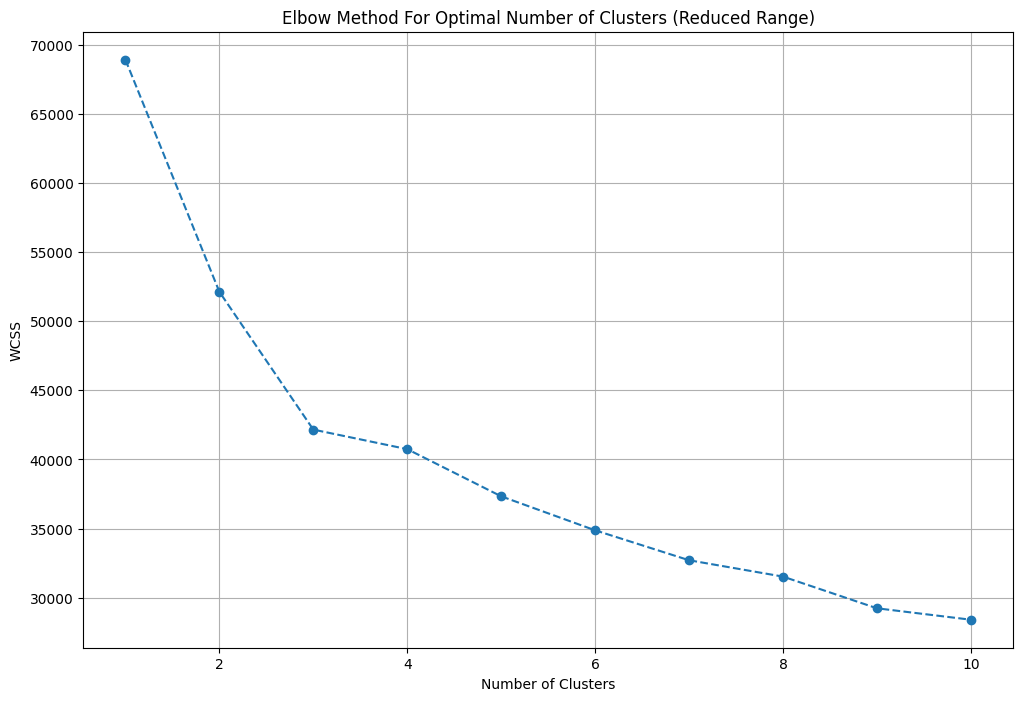

In [43]:
plt.figure(figsize=(12, 8))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [44]:
n_clusters = 3

# Fit the KMeans model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(scaled_data)

# Predict the cluster assignments for each row
cluster_assignments = kmeans.predict(scaled_data)

In [45]:
df = df.iloc[:,:-18]

In [46]:
df['furnishing_type'] = cluster_assignments

In [47]:
df.sample(5)[['furnishDetails','furnishing_type']]
# 0 -> unfurnished
# 1 -> semifurnished
# 2 -> furnished

,furnishDetails,furnishing_type
2818,"['7 Fan', '1 Exhaust Fan', '2 Geyser', '14 Lig...",1
1694,NaN,0
1920,NaN,0
3029,"['1 Water Purifier', '1 Fridge', '1 Exhaust Fa...",2
2898,"['6 Wardrobe', '8 Fan', '1 Exhaust Fan', '4 Ge...",1


5. features

In [48]:
df[['society','features']].sample(5)

,society,features
1856,unitech espace,"['Centrally Air Conditioned', 'Water purifier'..."
3668,antriksh heights,"['Lift(s)', 'High Ceiling Height', 'Maintenanc..."
809,vatika inxt floors,NaN
2381,suncity platinum towers,"['Power Back-up', 'Intercom Facility', 'Lift(s..."
521,emaar mgf marbella,"['Feng Shui / Vaastu Compliant', 'Private Gard..."


In [49]:
df['features'].isnull().sum()

np.int64(654)

In [55]:
app_df = pd.read_csv("../data/appartments.csv")

In [56]:
app_df.head(10)

,Unnamed: 0,PropertyName,PropertySubName,NearbyLocations,LocationAdvantages,Link,PriceDetails,TopFacilities
0,0,Smartworld One DXP,"2, 3, 4 BHK Apartment in Sector 113, Gurgaon","['Bajghera Road', 'Palam Vihar Halt', 'DPSG Pa...","{'Bajghera Road': '800 Meter', 'Palam Vihar Ha...",https://www.99acres.com/smartworld-one-dxp-sec...,"{'2 BHK': {'building_type': 'Apartment', 'area...","['Swimming Pool', 'Salon', 'Restaurant', 'Spa'..."
1,1,M3M Crown,"3, 4 BHK Apartment in Sector 111, Gurgaon","['DPSG Palam Vihar Gurugram', 'The NorthCap Un...","{'DPSG Palam Vihar Gurugram': '1.4 Km', 'The N...",https://www.99acres.com/m3m-crown-sector-111-g...,"{'3 BHK': {'building_type': 'Apartment', 'area...","['Bowling Alley', 'Mini Theatre', 'Manicured G..."
2,2,Adani Brahma Samsara Vilasa,"Land, 3, 4 BHK Independent Floor in Sector 63,...","['AIPL Business Club Sector 62', 'Heritage Xpe...","{'AIPL Business Club Sector 62': '2.7 Km', 'He...",https://www.99acres.com/adani-brahma-samsara-v...,{'3 BHK': {'building_type': 'Independent Floor...,"['Terrace Garden', 'Gazebo', 'Fountain', 'Amph..."
3,3,Sobha City,"2, 3, 4 BHK Apartment in Sector 108, Gurgaon","['The Shikshiyan School', 'WTC Plaza', 'Luxus ...","{'The Shikshiyan School': '2.9 KM', 'WTC Plaza...",https://www.99acres.com/sobha-city-sector-108-...,"{'2 BHK': {'building_type': 'Apartment', 'area...","['Swimming Pool', 'Volley Ball Court', 'Aerobi..."
4,4,Signature Global City 93,"2, 3 BHK Independent Floor in Sector 93 Gurgaon","['Pranavananda Int. School', 'DLF Site central...","{'Pranavananda Int. School': '450 m', 'DLF Sit...",https://www.99acres.com/signature-global-city-...,{'2 BHK': {'building_type': 'Independent Floor...,"['Mini Theatre', 'Doctor on Call', 'Concierge ..."
5,5,Whiteland The Aspen,"3, 4, 5 BHK Apartment in Sector 76, Gurgaon","['Vega Schools NH-8', 'DLF Corporate Greens', ...","{'Vega Schools NH-8': '650 Meter', 'DLF Corpor...",https://www.99acres.com/whiteland-the-aspen-se...,"{'3 BHK': {'building_type': 'Apartment', 'area...","['Reflexology Park', 'Card Room', 'High Speed ..."
6,6,Bestech Altura,"3, 4 BHK Apartment in Sector 79, Gurgaon","['Mount Olympus Junior School', 'Miracles Apol...","{'Mount Olympus Junior School': '1 Km', 'Mirac...",https://www.99acres.com/bestech-altura-sector-...,"{'3 BHK': {'building_type': 'Apartment', 'area...","['Swimming Pool', 'Football', 'Flower Garden',..."
7,7,Elan The Presidential,"3, 4, 5 BHK Apartment in Sector 106, Gurgaon","['Dwarka Expy, Sector 109', 'Euro Internationa...","{'Dwarka Expy, Sector 109': '850 Meter', 'Euro...",https://www.99acres.com/elan-the-presidential-...,"{'3 BHK': {'building_type': 'Apartment', 'area...","['Swimming Pool', 'Aerobics Centre', 'Shopping..."
8,8,Signature Global City 92,"2, 3 BHK Independent Floor in Sector 92, Gurgaon","['Royal Institute Of Science & Management', 'P...",{'Royal Institute Of Science & Management': '1...,https://www.99acres.com/signature-global-city-...,{'2 BHK': {'building_type': 'Independent Floor...,"['Swimming Pool', 'Reflexology Park', 'Terrace..."
9,9,Emaar Digihomes,"2, 3 BHK Apartment in Sector 62, Gurgaon","['Imperia Mindspace', 'AIPL Business Tower', '...","{'Imperia Mindspace': '140 Meter', 'AIPL Busin...",https://www.99acres.com/emaar-digihomes-sector...,"{'2 BHK': {'building_type': 'Apartment', 'area...","['Mini Theatre', 'Swimming Pool', 'Salon', 'Ca..."


In [58]:
app_df['PropertyName'] = app_df['PropertyName'].str.lower()

In [59]:
temp_df = df[df['features'].isnull()]

In [60]:
temp_df.shape

(654, 26)

In [61]:
x = temp_df.merge(app_df,left_on='society',right_on='PropertyName',how='left')['TopFacilities']

In [62]:
df.loc[temp_df.index,'features'] = x.values

In [63]:
df['features'].isnull().sum()

np.int64(500)

In [64]:
from sklearn.preprocessing import MultiLabelBinarizer
import ast

In [66]:
df['features_list'] = df['features'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) and x.startswith('[') else [])

# Use MultiLabelBinarizer to convert the features list into a binary matrix
mlb = MultiLabelBinarizer()
features_binary_matrix = mlb.fit_transform(df['features_list'])

# Convert the binary matrix into a DataFrame
features_binary_df = pd.DataFrame(features_binary_matrix, columns=mlb.classes_)

In [67]:
features_binary_df.sample(5)

,24/7 Power Backup,24/7 Water Supply,24x7 Security,ATM,Aerobics Centre,Air Hockey,Airy Rooms,Amphitheatre,Automated Car Wash,Badminton Court,...,Visitors Parking,Volley Ball Court,Waiting Lounge,Waste Disposal,Water Softener Plant,Water Storage,Water purifier,Water softening plant,Wi-Fi Connectivity,Yoga/Meditation Area
611,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,1,1,0,0,0
2290,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,1,1,0,0
2812,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,1,1,0,0
2100,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3525,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [68]:
features_binary_df.shape

(3829, 130)

In [69]:
wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(features_binary_df)
    wcss_reduced.append(kmeans.inertia_)

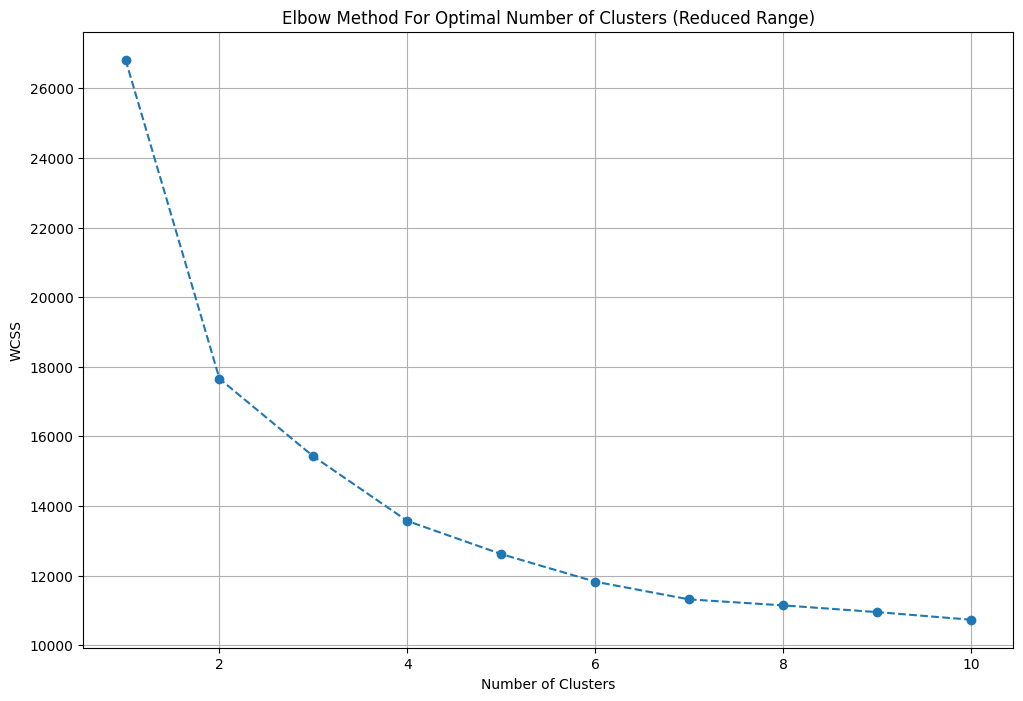

In [70]:
plt.figure(figsize=(12, 8))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [71]:
# Define the weights for each feature as provided
# Assigning weights based on perceived luxury contribution
weights = {
    '24/7 Power Backup': 8,
    '24/7 Water Supply': 4,
    '24x7 Security': 7,
    'ATM': 4,
    'Aerobics Centre': 6,
    'Airy Rooms': 8,
    'Amphitheatre': 7,
    'Badminton Court': 7,
    'Banquet Hall': 8,
    'Bar/Chill-Out Lounge': 9,
    'Barbecue': 7,
    'Basketball Court': 7,
    'Billiards': 7,
    'Bowling Alley': 8,
    'Business Lounge': 9,
    'CCTV Camera Security': 8,
    'Cafeteria': 6,
    'Car Parking': 6,
    'Card Room': 6,
    'Centrally Air Conditioned': 9,
    'Changing Area': 6,
    "Children's Play Area": 7,
    'Cigar Lounge': 9,
    'Clinic': 5,
    'Club House': 9,
    'Concierge Service': 9,
    'Conference room': 8,
    'Creche/Day care': 7,
    'Cricket Pitch': 7,
    'Doctor on Call': 6,
    'Earthquake Resistant': 5,
    'Entrance Lobby': 7,
    'False Ceiling Lighting': 6,
    'Feng Shui / Vaastu Compliant': 5,
    'Fire Fighting Systems': 8,
    'Fitness Centre / GYM': 8,
    'Flower Garden': 7,
    'Food Court': 6,
    'Foosball': 5,
    'Football': 7,
    'Fountain': 7,
    'Gated Community': 7,
    'Golf Course': 10,
    'Grocery Shop': 6,
    'Gymnasium': 8,
    'High Ceiling Height': 8,
    'High Speed Elevators': 8,
    'Infinity Pool': 9,
    'Intercom Facility': 7,
    'Internal Street Lights': 6,
    'Internet/wi-fi connectivity': 7,
    'Jacuzzi': 9,
    'Jogging Track': 7,
    'Landscape Garden': 8,
    'Laundry': 6,
    'Lawn Tennis Court': 8,
    'Library': 8,
    'Lounge': 8,
    'Low Density Society': 7,
    'Maintenance Staff': 6,
    'Manicured Garden': 7,
    'Medical Centre': 5,
    'Milk Booth': 4,
    'Mini Theatre': 9,
    'Multipurpose Court': 7,
    'Multipurpose Hall': 7,
    'Natural Light': 8,
    'Natural Pond': 7,
    'Park': 8,
    'Party Lawn': 8,
    'Piped Gas': 7,
    'Pool Table': 7,
    'Power Back up Lift': 8,
    'Private Garden / Terrace': 9,
    'Property Staff': 7,
    'RO System': 7,
    'Rain Water Harvesting': 7,
    'Reading Lounge': 8,
    'Restaurant': 8,
    'Salon': 8,
    'Sauna': 9,
    'Security / Fire Alarm': 9,
    'Security Personnel': 9,
    'Separate entry for servant room': 8,
    'Sewage Treatment Plant': 6,
    'Shopping Centre': 7,
    'Skating Rink': 7,
    'Solar Lighting': 6,
    'Solar Water Heating': 7,
    'Spa': 9,
    'Spacious Interiors': 9,
    'Squash Court': 8,
    'Steam Room': 9,
    'Sun Deck': 8,
    'Swimming Pool': 8,
    'Temple': 5,
    'Theatre': 9,
    'Toddler Pool': 7,
    'Valet Parking': 9,
    'Video Door Security': 9,
    'Visitor Parking': 7,
    'Water Softener Plant': 7,
    'Water Storage': 7,
    'Water purifier': 7,
    'Yoga/Meditation Area': 7
}
# Calculate luxury score for each row
luxury_score = features_binary_df[list(weights.keys())].multiply(list(weights.values())).sum(axis=1)

In [72]:
df['luxury_score'] = luxury_score

In [73]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,features_list,luxury_score
0,flat,raheja navodaya,sector 92,0.62,4807.0,1290.0,Built Up area: 1498 (139.17 sq.m.)Carpet area:...,2,2,2,...,1498.0,1064.0,0,0,0,0,0,0,[],0
1,flat,paras quartier,gwal pahari,5.90,11028.0,5350.0,Built Up area: 5350 (497.03 sq.m.),4,4,3+,...,5350.0,NaN,0,0,0,0,0,0,"[Mini Theatre, Swimming Pool, Business Lounge,...",63
2,flat,signature global synera,sector 81,0.50,7886.0,634.0,Carpet area: 634 (58.9 sq.m.),2,2,1,...,NaN,634.0,0,0,0,0,0,2,"[Security / Fire Alarm, Feng Shui / Vaastu Com...",97
3,flat,ss the leaf,sector 85,2.05,7290.0,2812.0,Super Built up area 2812(261.24 sq.m.)Built Up...,4,4,3+,...,2500.0,2250.0,0,1,0,0,0,1,"[Feng Shui / Vaastu Compliant, Security / Fire...",49
4,flat,m3m heights,sector 65,1.99,15793.0,1260.0,Super Built up area 1260(117.06 sq.m.),2,2,2,...,NaN,NaN,0,0,0,0,0,0,"[Bus Shelter, Infinity Pool, Swimming Pool, Ba...",48


In [74]:
df.drop(columns=['nearbyLocations','furnishDetails','features','features_list','additionalRoom'],inplace=True)

In [75]:
df.sample(5)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
3354,house,not applicable,sector 4,0.65,13000.0,500.0,Plot area 500(46.45 sq.m.),2,1,1,...,NaN,500.0,NaN,0,0,0,0,0,0,7
1312,flat,puri diplomatic greens,sector 111,3.45,11694.0,2950.0,Super Built up area 2950(274.06 sq.m.),4,5,3+,...,2950.0,NaN,NaN,0,1,0,0,0,0,101
403,house,dlf pink town house,sector 24,1.90,3786.0,5018.0,Built Up area: 5018 (466.19 sq.m.),10,9,3+,...,NaN,5018.0,NaN,0,0,0,0,1,2,29
1310,house,independent,sector 105,9.90,49500.0,2000.0,Built Up area: 2000 (185.81 sq.m.)Carpet area:...,2,2,2,...,NaN,2000.0,1800.0,0,0,0,0,0,0,0
2355,house,vatika sovereign next,sector 82a,3.85,7500.0,5133.0,Built Up area: 5140 (477.52 sq.m.),5,6,3+,...,NaN,5140.0,NaN,0,0,0,0,0,0,53


In [76]:
df.shape

(3829, 23)

In [77]:
df.to_csv('../data/gurgaon_properties_cleaned_v2.csv',index=False)